# Multiple Linear Regression in StatsModels

## Introduction

In this lesson, you'll learn how to run your first multiple linear regression model using StatsModels.

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Auto MPG Dataset

The [Auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/auto+mpg) is a classic example of a regression dataset that was first released in 1983.

MPG stands for "miles per gallon", the target to be predicted. There are also several potential independent variables.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("auto-mpg.csv")
data.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0          4         140.0          86    2790          15.6   
388  44.0          4          97.0          52    2130          24.6   
389  32.0          4         135.0          84    2295          11.6   
390  28.0          4         120.0          79    2625          18.6   
391  31.0          4         119.0          82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  

Let's look at correlations between the other variables and `mpg`. We need to remove `car name` since it is categorical.

In [2]:
data = data.drop(columns=['car name'])

In [3]:
data.corr()["mpg"]

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

Since correlation is a measure related to regression modeling, we can see that there seems to be some relevant signal here, with lots of variables that have medium-to-strong correlations with MPG.

## Starting with a Simple Linear Regression

Regression models are evaluated against a "baseline". For simple linear regression, this baseline is an "intercept-only" model that just predicts the mean of the dependent variable every time. For multiple linear regression, we typically build a simple linear regression to be that baseline.

Since `weight` is the feature with the strongest correlation, let's build a simple linear regression with that.

In other words, we are setting up the formula

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$

Where $\hat{y}$ is `mpg`, the dependent (endogenous) variable, and $x$ is `weight`, the independent (exogenous) variable. When we fit our model, we are looking for $\hat{\beta_1}$ (the slope) and $\hat{\beta_0}$ (the intercept).

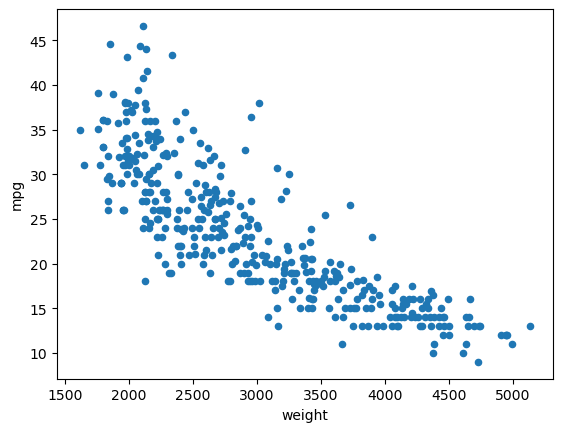

In [4]:
data.plot.scatter(x="weight", y="mpg");

In [5]:
y = data["mpg"]
X_baseline = data[["weight"]]

In [6]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          6.02e-102
Time:                        23:06:58   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

### Simple Linear Regression Results

Looking at the summary above, we can see that the regression line we found was

$$ \hat{mpg} = 46.2165 - 0.0076 weight $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 70% of the variance in MPG
* The model coefficients (`const` and `weight`) are both statistically significant, with t-statistic p-values well below 0.05
* If a car weighed 0 lbs, we would expect MPG to be about 46
* For each increase of 1 lb in car weight, we see an associated decrease in MPG of about .008

### Simple Linear Regression Visualization

We'll also plot the actual vs. predicted values:

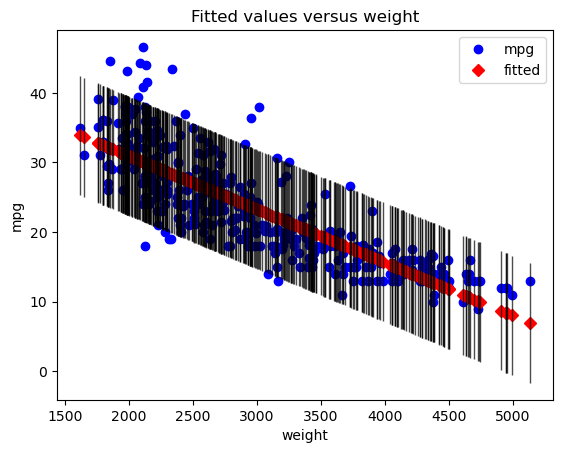

In [7]:
sm.graphics.plot_fit(baseline_results, "weight")
plt.show()

The regression line:

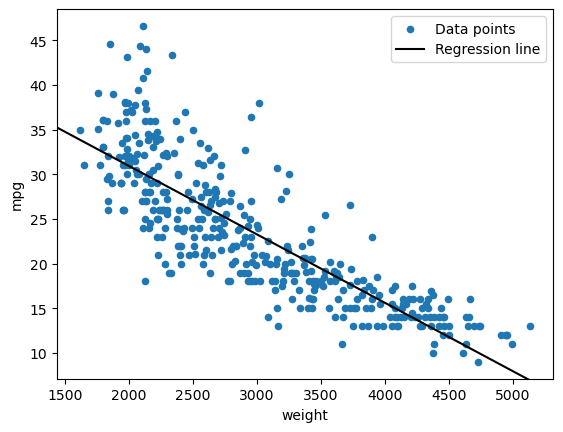

In [8]:
fig, ax = plt.subplots()
data.plot.scatter(x="weight", y="mpg", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

And the residuals:

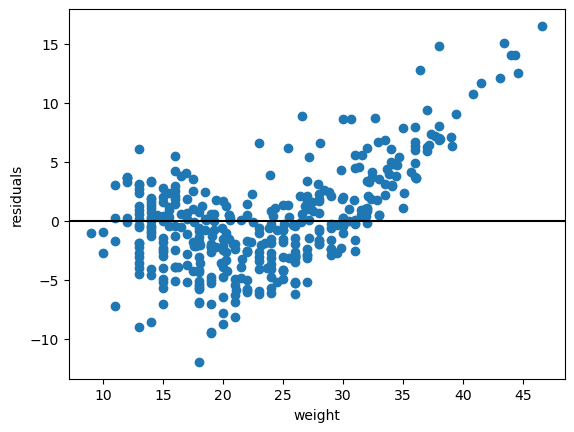

In [9]:
fig, ax = plt.subplots()

ax.scatter(data["mpg"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("weight")
ax.set_ylabel("residuals");

## Adding Another Independent Variable

Now let's expand from our simple linear regression to a multiple linear regression. It looks like `model year` is our most strongly _positively_ correlated predictor, so let's add that.

The process of building this model with StatsModels is very similar to the process of building our baseline simple regression model; this time we simply create an `X` variable containing multiple columns.

In [10]:
X_second = data[["weight", "model year"]]
X_second

,weight,model year
0,3504,70
1,3693,70
2,3436,70
3,3433,70
4,3449,70
...,...,...
387,2790,82
388,2130,82
389,2295,82
390,2625,82


In [11]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.33e-140
Time:                        23:14:05   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.0

### Model with Two Features Results

This time, the model we built was:

$$ \hat{mpg} = -14.3473 - 0.0066 weight + 0.7573 model\_year $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 81% of the variance in MPG
* The model coefficients (`const`, `weight`, and `model year`) are all statistically significant, with t-statistic p-values well below 0.05
* For each increase of 1 lb in car weight, we see an associated decrease in MPG of about .007
  * This is a little bit smaller of a decrease than we saw with the simple model, but not a big change. This means that model year was not meaningfully confounding in the relationship between weight and MPG
* For each increase of 1 in the model year, we see an associated increase in MPG of about 0.76

Notice that the `const` coefficient has gone from a positive number to a negative number. This is because the intercept is now with respect to both the weight and the model year. How should we interpret a value of zero for model year?

In [12]:
data["model year"].value_counts(sort=False)

model year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: count, dtype: int64

Since we know this is a dataset from 1983, it is reasonable to assume that these represent years from 1970 to 1982. Therefore a zero for model year means 1900.

Thus our intercept of about -14.3 means that our model predicts that a car released in 1900 that weighed 0 lbs would have an MPG of -14.3. This is fairly nonsensical, but some intercept is needed to build a linear model. Don't worry too much about trying to draw insights from this value.

### Multiple Linear Regression Visualization

We could try to make a 3D plot to show the plane that our model represents. However a more conventional (and extensible) approach is to use several different plots to show different perspectives on the model.

#### Model Fit

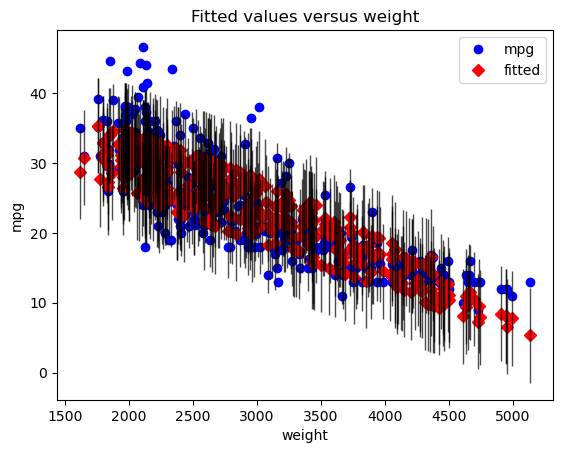

In [13]:
sm.graphics.plot_fit(second_results, "weight")
plt.show()

This shows the true (blue) vs. predicted (red) values, with the particular predictor (in this case, `weight`) along the x-axis. Note that unlike with a simple regression, the red dots don't appear in a perfectly straight line. This is because their predictions are made based on the entire model, not just this predictor.

We can also plot the fit for the other predictor, `model year`:

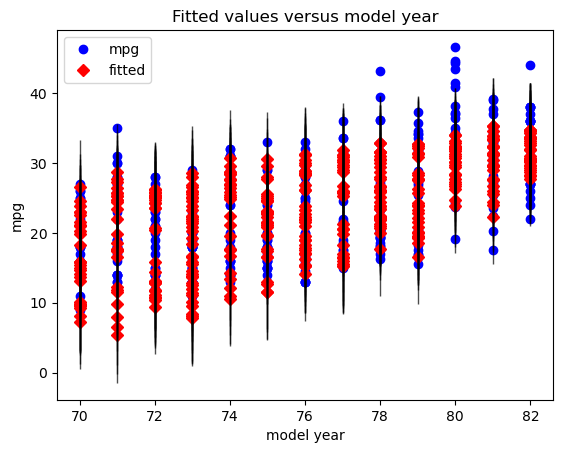

In [14]:
sm.graphics.plot_fit(second_results, "model year")
plt.show()

#### Partial Regression Plot

Then, instead of a basic scatter plot with a best-fit line (since our model is now higher-dimensional), we'll use two ***partial regression plots***, one for each of our predictors.

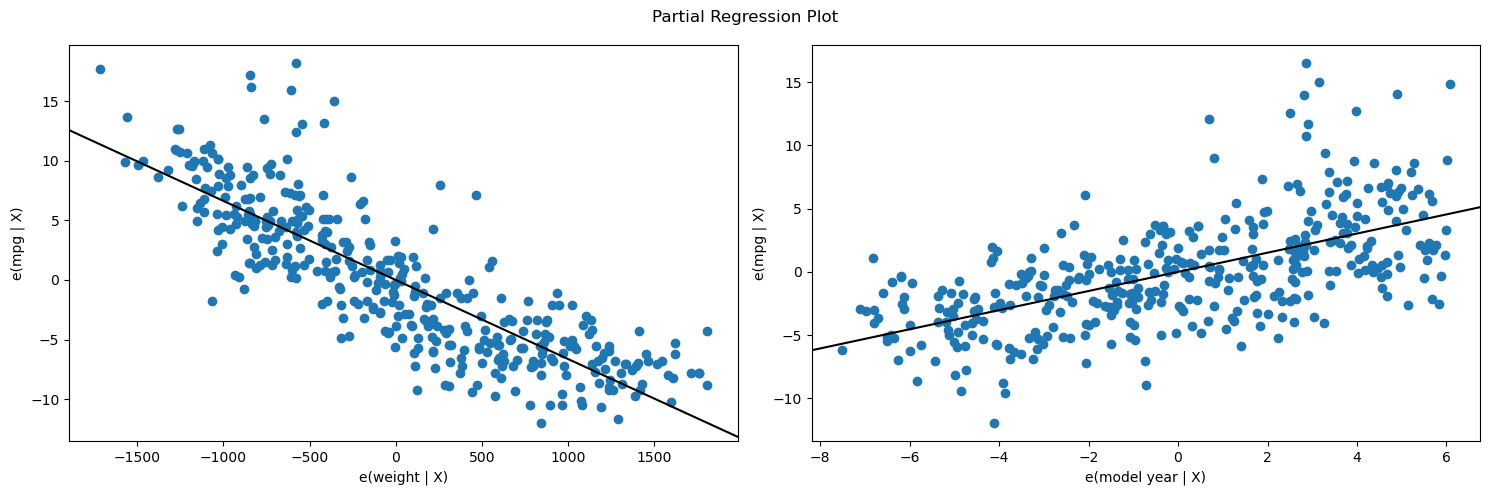

In [15]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["weight", "model year"], fig=fig)
plt.tight_layout()
plt.show()

This may initially appear similar to the plotted regression line from our simple linear regression example, but it is not actually showing the predictor value on the x-axis vs. the target value on the y-axis. Instead, the goal is to show the ***marginal contribution*** of this particular predictor.

First let's focus on the left side, which shows the partial regression plot for `weight`.

The math behind this is that StatsModels has computed the part of `weight` that is not explained by the rest of the model, and put it on the x-axis. Then it has computed the part of `mpg` that is not explained by the rest of the model, and put it on the y-axis. **If this plot shows a linear relationship with a non-zero slope, that means that it is beneficial to add `weight` to the model, vs. having a model without `weight`** (i.e. a model with just an intercept and `model year`).

The partial regression plot for `model year` is similarly showing the marginal contribution of `model year` compared to a model with just `weight`.

A reasonable conclusion to reach, looking at these plots, is that both predictors are useful and should be included in the model.

#### Plotting Residuals

One approach to plotting residuals from a multiple regression model is to use the same approach as in simple regression, just plotting the value of the predictor on the x-axis vs. the model residuals on the y-axis.

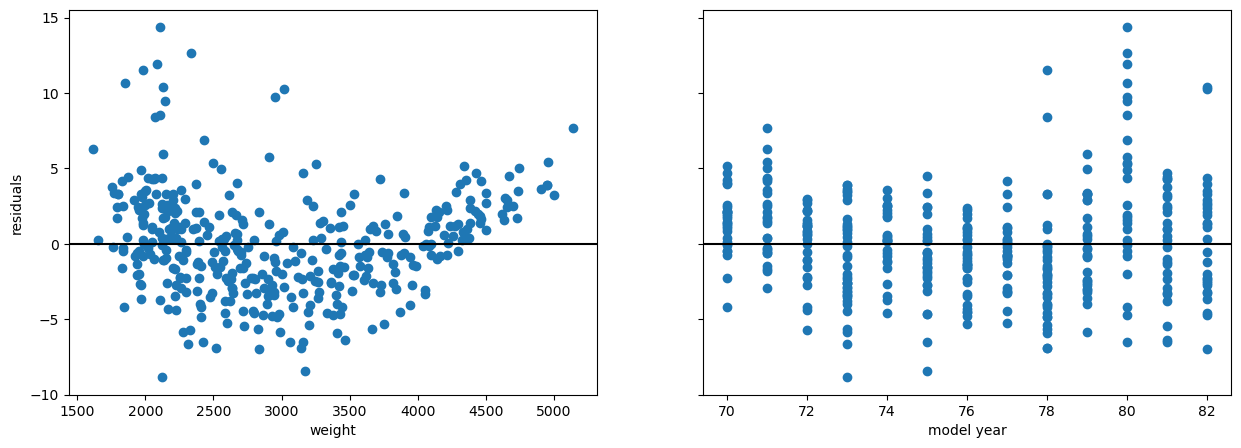

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

weight_ax = axes[0]
weight_ax.scatter(data["weight"], second_results.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("weight")
weight_ax.set_ylabel("residuals")

year_ax = axes[1]
year_ax.scatter(data["model year"], second_results.resid)
year_ax.axhline(y=0, color="black")
year_ax.set_xlabel("model year");

Another approach is using a component and component-plus-residual plot, also known as a [CCPR plot](https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/ccpr.htm). A CCPR plot is a refinement of a partial _residual_ plot. A partial residual plot is a scatter plot with the predictor on the x-axis and the model residuals plus the predictor times its coefficient on the y-axis. Then the CCPR plot also includes a line representing the fitted line of the predictor times its coefficient. Similar to a partial regression plot, you are essentially looking for the points and best-fit line to match up and form a linear relationship with non-zero slope.

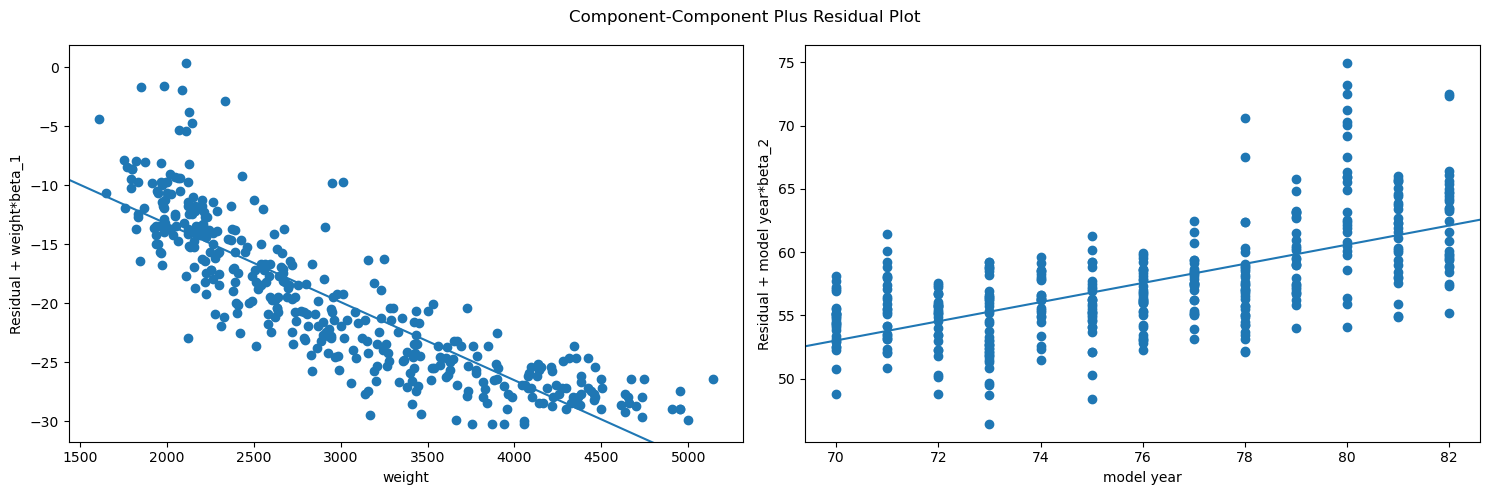

In [17]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_ccpr_grid(second_results, exog_idx=["weight", "model year"], grid=(1,2), fig=fig)
plt.tight_layout()
plt.show()

#### Plotting All Four at Once

If you are interested in creating all of these plots at once for a given predictor, StatsModels has a wrapper that can do this also:

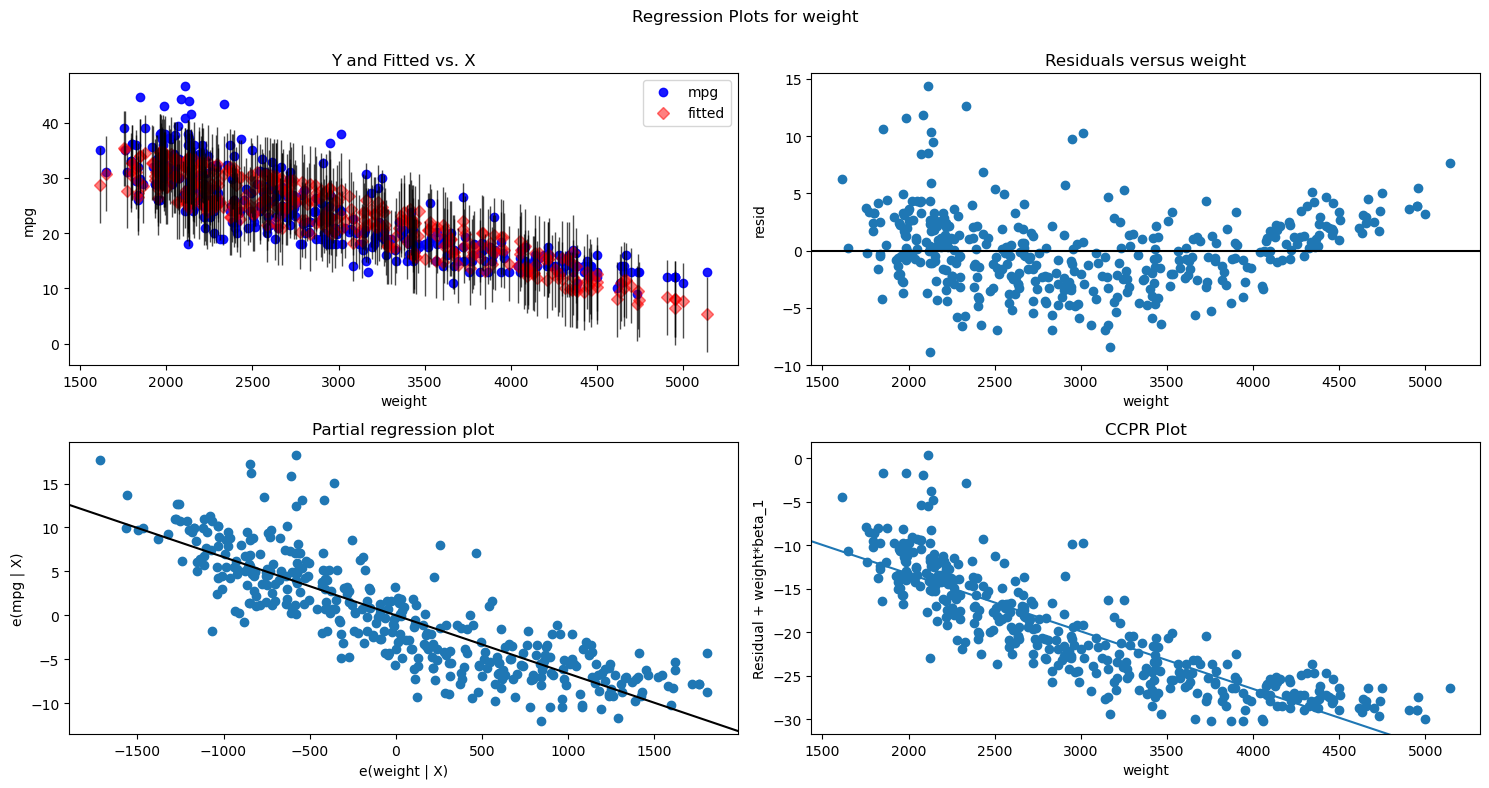

In [18]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "weight", fig=fig)
plt.show()

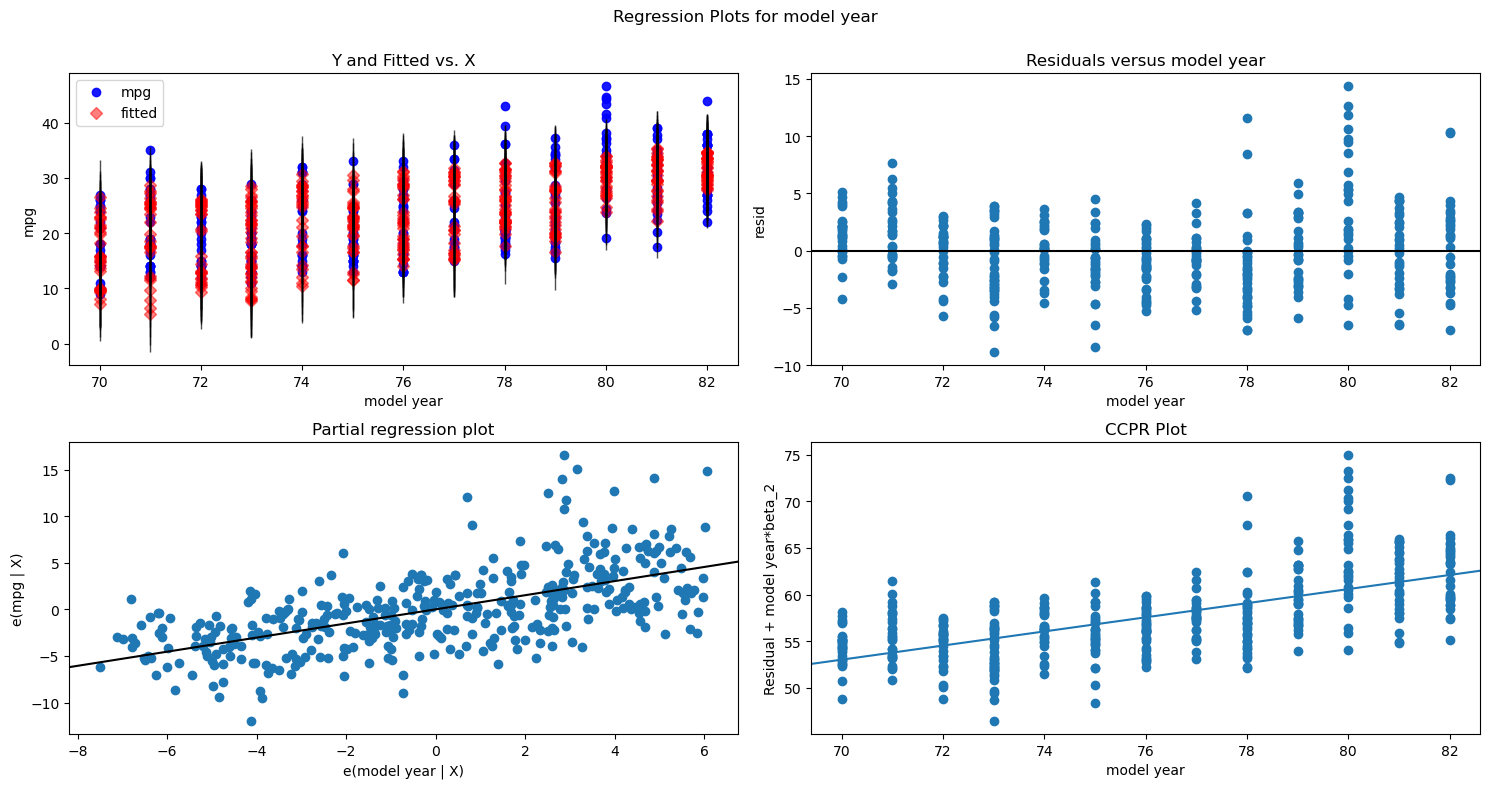

In [19]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results, "model year", fig=fig)
plt.show()

## Multiple Regression with Many Features

Now that we have a model with 1 predictor (`weight`) as well as a model with 2 predictors (`weight` and `model year`), let's try a model that uses all of the available numeric columns as features.

In [20]:
# dropping mpg because this is our target, then only selecting numeric features
X_all = data.drop("mpg", axis=1).select_dtypes("number")
X_all

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


In [21]:
third_model = sm.OLS(y, sm.add_constant(X_all))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          2.04e-139
Time:                        23:28:21   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

### Model with Many Features Results

This time, the model we built was:

$$ \hat{mpg} = -17.2184 - 0.4934 cylinders + 0.0199 displacement - 0.0170 horsepower - 0.0065 weight + 0.0806 acceleration + 0.7508 model\_year + 1.4261 origin $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 82% of the variance in MPG
  * The fact that we went from 2 predictors to 7 predictors and only increased R-Squared by 1% is an indicator that this is not a very good model
* Only some of the model coefficients are statistically significant
  * `const`, `displacement`, `weight`, `model year`, and `origin` have p-values below 0.05 and are therefore statistically significant
  * `cylinders`, `horsepower`, and `acceleration` have p-values above 0.05. This means that there is greater than a 1 in 20 chance that their true coefficients are 0 (i.e. they have no effect on MPG), and are thus not statistically significant at an alpha of 0.05

We could go through and interpret the coefficients as well, but for now we'll skip that because there are so many that are not statistically significant.

### Model with Many Features Visualization

If we ran `plot_regress_exog` on each of our predictors, that would be 28 different plots -- probably too many to draw any useful conclusions from. Instead, let's plot just the partial regression plots:

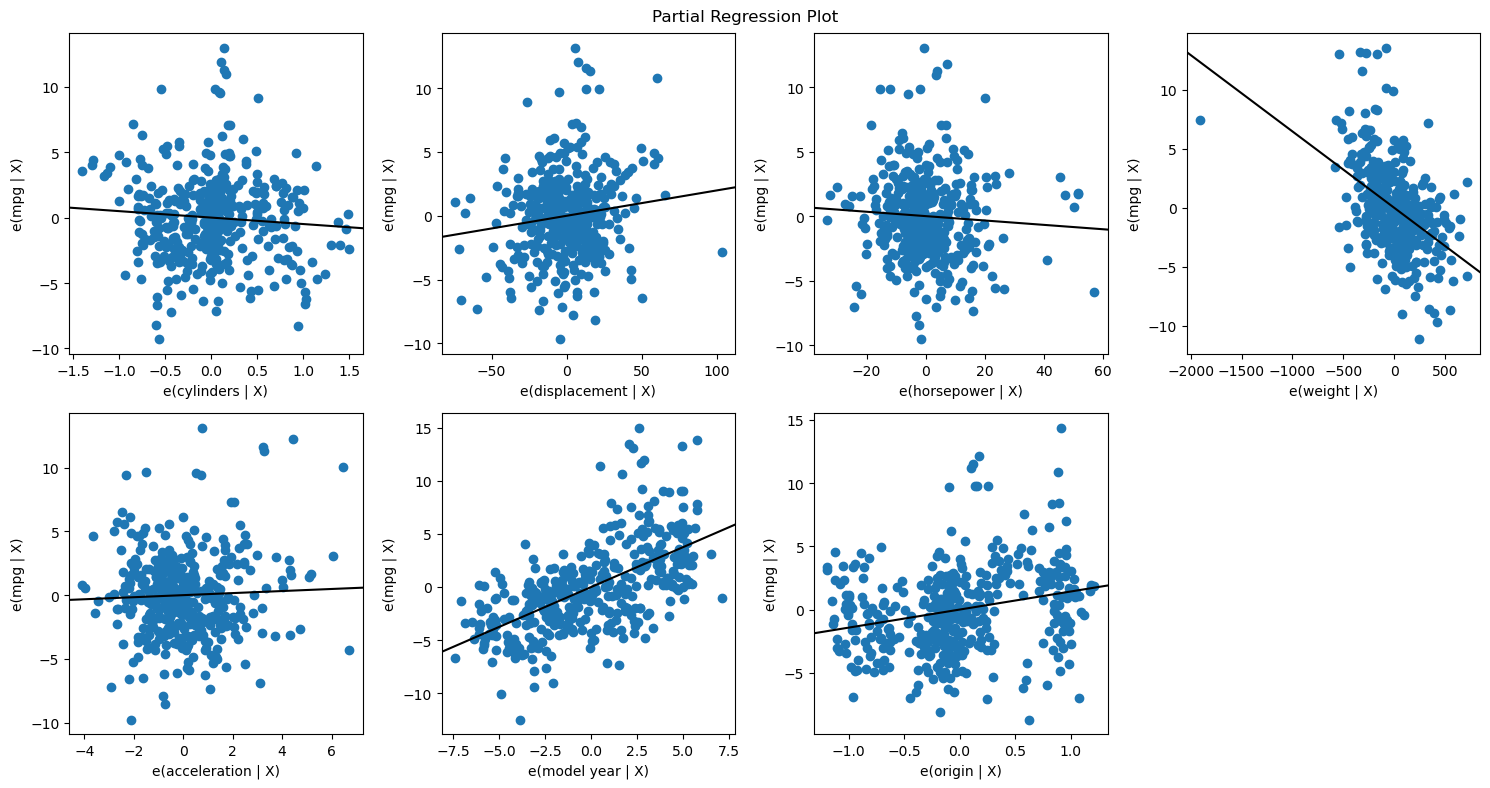

In [22]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

As you can see, as we have added more predictors, the partial regression plot for each individual one is looking worse. Other than `model year` and `origin`, we're seeing more of a cluster of dots rather than a clean linear relationship. We also see that several of them have slopes near zero.

A reasonable interpretation from these visualizations overall is that we have included too many predictors, and that we should consider removing some. We'll discuss more details on feature selection (techniques for deciding which features to include) in future lessons. 

## Level Up: Linear Regression Using scikit-learn

StatsModels is only one of several libraries that have implemented linear regression. Another library with linear regression is called scikit-learn.

Scikit-learn is known for its machine learning functionality and is generally very popular for data science workflows. In particular, scikit-learn emphasizes _predictive_ machine learning approaches. Therefore it does not automatically calculate anything related to statistical significance (e.g. p-values), it only calculates the model parameters.

For a [comparison of scikit-learn and statsmodels click here](https://medium.com/@hsrinivasan2/linear-regression-in-scikit-learn-vs-statsmodels-568b60792991).

In [23]:
from sklearn.linear_model import LinearRegression

First, let's recreate our baseline model:

In [24]:
sklearn_baseline_model = LinearRegression()
# passing in the same X and y, although the order is reversed
sklearn_baseline_model.fit(X_baseline, y)

print(f"""
StatsModels R-Squared:    {baseline_results.rsquared}
scikit-learn R-Squared:   {sklearn_baseline_model.score(X_baseline, y)}

StatsModels intercept:    {baseline_results.params["const"]}
scikit-learn intercept:   {sklearn_baseline_model.intercept_}

StatsModels coefficient:  {baseline_results.params["weight"]}
scikit-learn coefficient: {sklearn_baseline_model.coef_[0]}
""")


StatsModels R-Squared:    0.6926304331206254
scikit-learn R-Squared:   0.6926304331206254

StatsModels intercept:    46.2165245490176
scikit-learn intercept:   46.21652454901758

StatsModels coefficient:  -0.00764734253577958
scikit-learn coefficient: -0.007647342535779581



Then our model with two features:

In [25]:
sklearn_second_model = LinearRegression()
sklearn_second_model.fit(X_second, y)

print(f"""
StatsModels R-Squared:    {second_results.rsquared}
scikit-learn R-Squared:   {sklearn_second_model.score(X_second, y)}

StatsModels intercept:     {second_results.params["const"]}
scikit-learn intercept:    {sklearn_second_model.intercept_}

StatsModels coefficients:  {second_results.params[1:].values}
scikit-learn coefficients: {sklearn_second_model.coef_}
""")


StatsModels R-Squared:    0.8081803058793997
scikit-learn R-Squared:   0.8081803058793997

StatsModels intercept:     -14.347253017615799
scikit-learn intercept:    -14.347253017615852

StatsModels coefficients:  [-0.00663208  0.75731828]
scikit-learn coefficients: [-0.00663208  0.75731828]



Then finally our model with all numeric features:

In [26]:
sklearn_third_model = LinearRegression()
sklearn_third_model.fit(X_all, y)

print(f"""
StatsModels R-Squared:    {third_results.rsquared}
scikit-learn R-Squared:   {sklearn_third_model.score(X_all, y)}

StatsModels intercept:     {third_results.params["const"]}
scikit-learn intercept:    {sklearn_third_model.intercept_}

StatsModels coefficients:  {third_results.params[1:].values}
scikit-learn coefficients: {sklearn_third_model.coef_}
""")


StatsModels R-Squared:    0.8214780764810599
scikit-learn R-Squared:   0.8214780764810597

StatsModels intercept:     -17.218434622018037
scikit-learn intercept:    -17.21843462201753

StatsModels coefficients:  [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
scikit-learn coefficients: [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]



The purpose of this demonstration is so that you can see how StatsModels is just one way of representing a linear regression model with code. Different libraries will use different formats for setting up the x and y values and different formats for displaying the results, but they are fundamentally using the same algorithm "under the hood". As you learn about more types of models and more libraries that represent these models, you do not have to memorize the syntax for using them! Instead, so long as you understand the underlying concepts, you can always refer to the documentation to figure out how a given library represents the modeling process.

## Summary

Creating multiple linear regression models in StatsModels is very similar to creating simple linear regression models. The only difference is that you supply an x variable containing multiple features instead of just one. In this lesson you saw examples of multiple regression models as well as interpretations of their metrics and coefficients. You also saw some visualization techniques that we use to inspect model fit and residuals in the context of a linear regression model with multiple predictors.